# Base Model

In [1]:
import seaborn as sns
from pandas import read_parquet
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from data import file

In [2]:
data_train = read_parquet(file.news_articles_cleaned_train)
data_train

,text_original,label,text_tokenized,text_tokenized_keywords,text_keywords,text_tokenized_lemmas,text_lemmas,text_tokenized_stemmed,text_stem
1637,"Asylverfahren sollen verkürzt werden, dafür is...",Wirtschaft,"[asylverfahren, sollen, verkürzt, werden, ,, d...","[asylverfahren, sollen, verkürzt, ,, dafür, ge...","asylverfahren sollen verkürzt , dafür gewerksc...","[asylverfahren, sollen, verkürzen, dafür, gewe...",asylverfahren sollen verkürzen dafür gewerksch...,"[asylverfahr, soll, verkurzt, dafur, gewerksch...",asylverfahr soll verkurzt dafur gewerkschaft b...
7445,Umsatz im abgelaufenen Quartal fiel um 8 Proze...,Web,"[umsatz, im, abgelaufenen, quartal, fiel, um, ...","[umsatz, abgelaufenen, quartal, fiel, 8, proze...","umsatz abgelaufenen quartal fiel 8 prozent 12,...","[umsatz, abgelaufen, quartal, fallen, 8, proze...","umsatz abgelaufen quartal fallen 8 prozent 12,...","[umsatz, abgelauf, quartal, fiel, 8, prozent, ...","umsatz abgelauf quartal fiel 8 prozent 12,9 mr..."
8808,Wegen Nichterfüllung eines Lizenzkriteriums in...,Sport,"[wegen, nichterfüllung, eines, lizenzkriterium...","[wegen, nichterfüllung, lizenzkriteriums, stad...",wegen nichterfüllung lizenzkriteriums stadionf...,"[wegen, nichterfüllung, lizenzkriteriums, stad...",wegen nichterfüllung lizenzkriteriums stadionf...,"[weg, nichterfull, lizenzkriterium, stadionfra...",weg nichterfull lizenzkriterium stadionfrag na...
1982,Demokratische Präsidentschaftsanwärterin forde...,International,"[demokratische, präsidentschaftsanwärterin, fo...","[demokratische, präsidentschaftsanwärterin, fo...",demokratische präsidentschaftsanwärterin forde...,"[demokratische, präsidentschaftsanwärterin, fo...",demokratische präsidentschaftsanwärterin forde...,"[demokrat, prasidentschaftsanwarterin, fordert...",demokrat prasidentschaftsanwarterin fordert ko...
255,Republikaner: Transparenzregeln umgangen. Die ...,Web,"[republikaner, :, transparenzregeln, umgangen,...","[republikaner, :, transparenzregeln, umgangen,...",republikaner : transparenzregeln umgangen . us...,"[republikaner, transparenzregeln, umgangen, us...",republikaner transparenzregeln umgangen us-prä...,"[republikan, transparenzregeln, umgang, us-pra...",republikan transparenzregeln umgang us-praside...
...,...,...,...,...,...,...,...,...,...
5431,"Premier Alexis Tsipras, der ein neuerliches Vo...",International,"[premier, alexis, tsipras, ,, der, ein, neuerl...","[premier, alexis, tsipras, ,, neuerliches, vot...","premier alexis tsipras , neuerliches votum aus...","[premier, alexis, tsipras, neuerlich, votum, a...",premier alexis tsipras neuerlich votum ausschl...,"[premi, alexis, tsipras, neu, votum, ausgeschl...",premi alexis tsipras neu votum ausgeschloss st...
2368,Ein Kreditereignis bei BMW sollte ausbleiben. ...,Wirtschaft,"[ein, kreditereignis, bei, bmw, sollte, ausble...","[kreditereignis, bmw, ausbleiben, ., bmw, bedi...",kreditereignis bmw ausbleiben . bmw bedient ma...,"[kreditereignis, bmw, ausbleiben, bmw, bediene...",kreditereignis bmw ausbleiben bmw bedienen mar...,"[kreditereignis, bmw, ausbleib, bmw, bedient, ...",kreditereignis bmw ausbleib bmw bedient markt ...
3642,Fledermäuse sind von vielen Krankheitserregern...,Wissenschaft,"[fledermäuse, sind, von, vielen, krankheitserr...","[fledermäuse, vielen, krankheitserregern, ,, s...","fledermäuse vielen krankheitserregern , säuget...","[fledermäuse, viel, krankheitserregern, säuget...",fledermäuse viel krankheitserregern säugetiere...,"[fledermaus, viel, krankheitserreg, saugeti, b...",fledermaus viel krankheitserreg saugeti befall...
8420,"Ein Fossil aus Spanien mit ""Star Wars""-Bezug. ...",Wissenschaft,"[ein, fossil, aus, spanien, mit, ``, star, war...","[fossil, spanien, ``, star, wars, '', -bezug, ...",fossil spanien `` star wars '' -bezug . madrid...,"[fossil, spanien, ``, star, wars, -bezug, madr...",fossil spanien `` star wars -bezug madrid wien...,"[fossil, spani, ``, star, war, '', -bezug, mad...",fossil spani `` star war '' -bezug madrid/w

In [3]:
data_test = read_parquet(file.news_articles_cleaned_test)
data_test

,text_original,label,text_tokenized,text_tokenized_keywords,text_keywords,text_tokenized_lemmas,text_lemmas,text_tokenized_stemmed,text_stem
2038,Archäologen rekonstruierten das Massaker an mi...,Wissenschaft,"[archäologen, rekonstruierten, das, massaker, ...","[archäologen, rekonstruierten, massaker, minde...",archäologen rekonstruierten massaker mindesten...,"[archäologen, rekonstruieren, massaker, mindes...",archäologen rekonstruieren massaker mindestens...,"[archaolog, rekonstruiert, massak, mindest, 26...",archaolog rekonstruiert massak mindest 26 mens...
5661,"Beben der Stärke 6,5 erschüttert arme Region i...",Panorama,"[beben, der, stärke, 6,5, erschüttert, arme, r...","[beben, stärke, 6,5, erschüttert, arme, region...","beben stärke 6,5 erschüttert arme region weste...","[beben, stärken, 6,5, erschüttern, arme, regio...","beben stärken 6,5 erschüttern arme region west...","[beb, stark, 6,5, erschuttert, arm, region, we...","beb stark 6,5 erschuttert arm region west land..."
5824,Der FPÖ-Kandidat kennt das Spiel mit Emotionen...,Inland,"[der, fpö-kandidat, kennt, das, spiel, mit, em...","[fpö-kandidat, kennt, spiel, emotionen, ., wah...",fpö-kandidat kennt spiel emotionen . wahlkampf...,"[fpö-kandidat, kennen, spiel, emotionen, wahlk...",fpö-kandidat kennen spiel emotionen wahlkampf ...,"[fpo-kandidat, kennt, spiel, emotion, wahlkamp...",fpo-kandidat kennt spiel emotion wahlkampf zei...
7929,"Die PKK hat den Krieg in die Städte getragen, ...",International,"[die, pkk, hat, den, krieg, in, die, städte, g...","[pkk, krieg, städte, getragen, ,, sagt, sicher...","pkk krieg städte getragen , sagt sicherheitsex...","[pkk, krieg, städte, tragen, sagen, sicherheit...",pkk krieg städte tragen sagen sicherheitsexper...,"[pkk, krieg, stadt, getrag, sagt, sicherheitse...",pkk krieg stadt getrag sagt sicherheitsexpert ...
3936,Früheste Spuren systematischen Vogelviehverzeh...,Wissenschaft,"[früheste, spuren, systematischen, vogelviehve...","[früheste, spuren, systematischen, vogelviehve...",früheste spuren systematischen vogelviehverzeh...,"[früh, spuren, systematisch, vogelviehverzehrs...",früh spuren systematisch vogelviehverzehrs ent...,"[fruh, spur, systemat, vogelviehverzehr, entde...",fruh spur systemat vogelviehverzehr entdeckt a...
...,...,...,...,...,...,...,...,...,...
2616,Regierung kündigt schärfere Maßnahmen an – Übe...,Panorama,"[regierung, kündigt, schärfere, maßnahmen, an,...","[regierung, kündigt, schärfere, maßnahmen, –, ...",regierung kündigt schärfere maßnahmen – übergr...,"[regierung, kündigen, scharf, maßnahmen, überg...",regierung kündigen scharf maßnahmen übergriffe...,"[regier, kundigt, scharf, massnahm, ubergriff,...",regier kundigt scharf massnahm ubergriff oster...
621,Ärztekammer startet Petition – Kräuter will Be...,Inland,"[ärztekammer, startet, petition, –, kräuter, w...","[ärztekammer, startet, petition, –, kräuter, b...",ärztekammer startet petition – kräuter behaupt...,"[ärztekammer, starten, petition, kräuter, beha...",ärztekammer starten petition kräuter behauptun...,"[arztekamm, startet, petition, kraut, behaupt,...",arztekamm startet petition kraut behaupt pruf ...
2139,Gemeindebaumieter sind nicht viel ärmer als so...,Panorama,"[gemeindebaumieter, sind, nicht, viel, ärmer, ...","[gemeindebaumieter, ärmer, privaten, wohnmarkt...",gemeindebaumieter ärmer privaten wohnmarkt . w...,"[gemeindebaumieter, arm, privat, wohnmarkt, wi...",gemeindebaumieter arm privat wohnmarkt wien mi...,"[gemeindebaumiet, arm, privat, wohnmarkt, wien...",gemeindebaumiet arm privat wohnmarkt wien miet...
4633,US-Geschäftsmann Siamak Namazi wurde im Oktobe...,International,"[us-geschäftsmann, siamak, namazi, wurde, im, ...","[us-geschäftsmann, siamak, namazi, wurde, okto...",us-geschäftsmann siamak namazi wurde oktober t...,"[us-geschäftsmann, siamak, namazi, werden, okt...",us-geschäftsmann siamak namazi werden oktober ...,"[us-geschaftsmann, siamak, namazi, wurd, oktob...",us-geschaftsmann siamak namazi wurd oktob tehe

In [4]:
from numpy import atleast_1d

def join(tokens):
    return ' '.join(tokens)

labelEncoder = LabelEncoder()
labelEncoder.fit(data_train["label"])

X_train, y_train = data_train.text_tokenized_lemmas.map(join), atleast_1d(
    labelEncoder.transform(data_train["label"])).transpose()
X_test, y_test = data_test.text_tokenized_lemmas.map(join), atleast_1d(
    labelEncoder.transform(data_test["label"])).transpose()

In [5]:
X_train

1637    asylverfahren sollen verkürzen dafür gewerksch...
7445    umsatz abgelaufen quartal fallen 8 prozent 12,...
8808    wegen nichterfüllung lizenzkriteriums stadionf...
1982    demokratische präsidentschaftsanwärterin forde...
255     republikaner transparenzregeln umgangen us-prä...
                              ...                        
5431    premier alexis tsipras neuerlich votum ausschl...
2368    kreditereignis bmw ausbleiben bmw bedienen mar...
3642    fledermäuse viel krankheitserregern säugetiere...
8420    fossil spanien `` star wars -bezug madrid wien...
6661    general motors ford setzen mehr fahrzeuge ab u...
Name: text_tokenized_lemmas, Length: 7191, dtype: object

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("vec", CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ("clf", SGDClassifier())
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vec', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier())])

In [7]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


In [8]:

report = classification_report(y_train, y_train_pred)
print("Train:")
print(report)
report = classification_report(y_test, y_test_pred)
print("Test:")
print(report)

Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       468
           1       0.99      0.99      0.99       710
           2       1.00      0.99      1.00      1058
           3       1.00      1.00      1.00       377
           4       0.99      0.99      0.99      1174
           5       1.00      1.00      1.00       841
           6       1.00      0.99      1.00      1174
           7       0.99      1.00      0.99       988
           8       1.00      1.00      1.00       401

    accuracy                           1.00      7191
   macro avg       1.00      1.00      1.00      7191
weighted avg       1.00      1.00      1.00      7191

Test:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       133
           1       0.81      0.80      0.81       203
           2       0.86      0.91      0.88       302
           3       0.87      0.89      0.88       108
           

[[102   3   5   7   4   1  10   1   0]
 [  2 162   3   1  21   0   1   9   4]
 [  0   1 276   0  16   0   2   7   0]
 [  2   1   1  96   2   1   1   3   1]
 [  1  13  16   4 277   0   4  12   9]
 [  0   1   2   0   1 233   1   2   0]
 [  1   3   6   1   8   0 298  16   2]
 [  1  13   9   1   9   1   9 239   0]
 [  1   2   4   0   3   0   3   4  98]]


<AxesSubplot:>

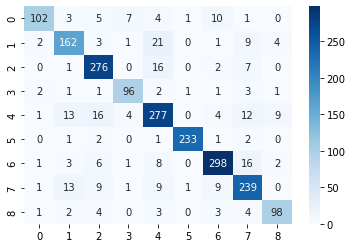

In [9]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_test_pred)
print(cf_matrix)

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.3g')

<AxesSubplot:>

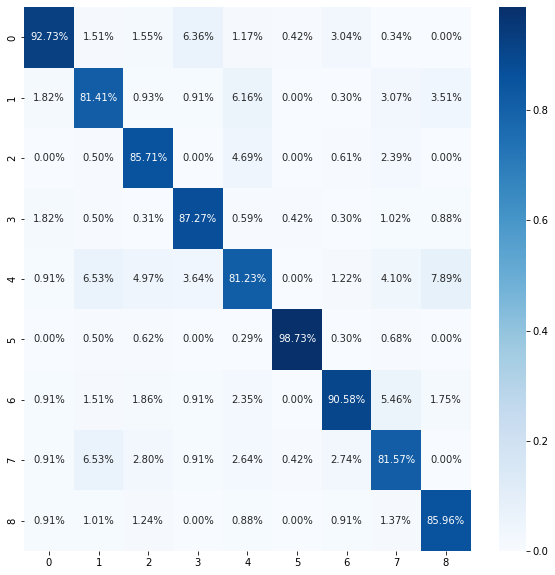

In [10]:

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cf_matrix / sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', ax=ax)